This Notebook shows how to optimise the pruning parameters of your network based on pairwise connectivity data.

First we need to create a small network that we can use for the optimisation of the pruning parameters.

In this example we do not need to have realistic neuron densities, so we will place the neurons in a cube of diameter 100 micrometers.

In [1]:
import os
network_path = os.path.join("networks","dspn_to_dspn")
n_neurons = 100
pop_size = 10
epochs = 10

pre_type = "dSPN"
post_type = "dSPN"
con_type = "GABA"

SPN2SPNdistDepPruning = "1-exp(-(0.4*d/60e-6)**2)"
extra_pruning_parameters = { 'distPruning': SPN2SPNdistDepPruning }

experimental_data = [(0, 50e-6, 3/47.0), (0, 100e-6, 3/66.0)]

In [2]:
from snudda.place.create_cube_mesh import create_cube_mesh

mesh_file = os.path.join(network_path, "cube-mesh.obj")
create_cube_mesh(mesh_file, [0,0,0], 100e-6)

from snudda.init import SnuddaInit
si = SnuddaInit(network_path=network_path, random_seed=123, snudda_data="../../../../BasalGangliaData/data/")

si.define_structure(struct_name="Cube", struct_mesh=mesh_file, d_min=12e-6, mesh_bin_width=25e-6)

if pre_type == post_type:
    si.add_neurons(name=pre_type, num_neurons=n_neurons, volume_id="Cube",
                    neuron_dir=os.path.join("$DATA","neurons","striatum","dspn"))
else:
    si.add_neurons(name=pre_type, num_neurons=int(n_neurons/2), volume_id="Cube",
                    neuron_dir=os.path.join("$DATA","neurons","striatum","dspn"))
    si.add_neurons(name=post_type, num_neurons=int(n_neurons/2), volume_id="Cube",
                    neuron_dir=os.path.join("$DATA","neurons","striatum","dspn"))
    

# The parameters here does not matter, they will be set during optimisation
si.add_neuron_target(neuron_name=pre_type,
                     target_name=post_type,
                     connection_type=con_type,
                     dist_pruning=SPN2SPNdistDepPruning,
                     f1=None, soft_max=None, mu2=None,
                     a3=None,
                     conductance=[0.24e-9, 0.1e-9],
                     mod_file="tmGabaA")

si.write_json()

Adding neurons: dSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/dspn
Writing networks/dspn_to_dspn/network-config.json


In [3]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path, verbose=False)
sp.place()

Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/dspn_to_dspn/network-config.json


Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/dspn_to_dspn/network-config.json


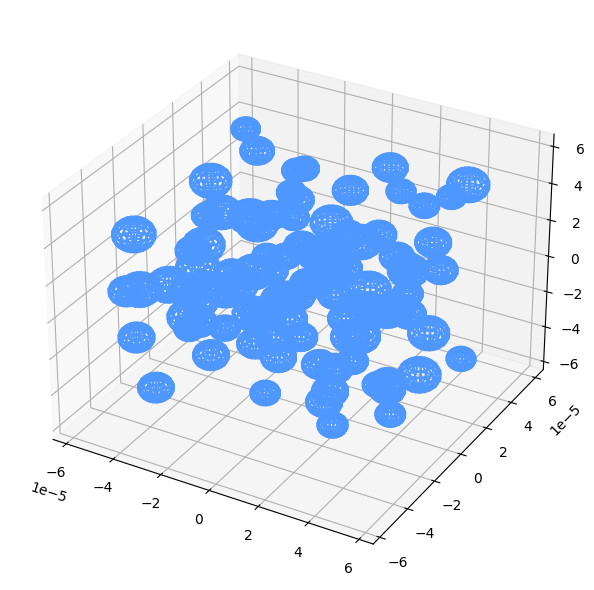

In [4]:
from snudda.plotting import PlotNetwork
network_file = os.path.join(network_path, "network-neuron-positions.hdf5")
pn = PlotNetwork(network_file)
pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False)
pn.close() 

In [5]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path, hyper_voxel_size=100)
sd.detect()

Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/dspn_to_dspn/network-config.json
No d_view specified, running distribute neurons in serial
Processing hyper voxel : 56/125 (100 neurons)
Processing hyper voxel : 31/125 (100 neurons)
Processing hyper voxel : 30/125 (85 neurons)
Processing hyper voxel : 32/125 (84 neurons)
Processing hyper voxel : 36/125 (83 neurons)
Processing hyper voxel : 26/125 (78 neurons)
Processing hyper voxel : 61/125 (71 neurons)
Processing hyper voxel : 51/125 (65 neurons)
Processing hyper voxel : 55/125 (61 neurons)
Processing hyper voxel : 57/125 (58 neurons)
Processing hyper voxel : 35/125 (37 neurons)
Processing hyper voxel : 6/125 (32 neurons)
Processing hyper voxel : 25/125 (31 neurons)
Processing hyper voxel : 27/125 (29 neurons)
Processing hyper voxel : 37/125 (29 neurons)
Processing hyper voxel : 52/125 (21 neurons)
Processing hyper voxel : 62/125 (20 neurons)
Processing hyper voxel : 50/125 (19 neurons)
Processing hyper voxel : 60/1

In [6]:
from snudda.optimise.optimise_pruning import OptimisePruning
op = OptimisePruning(network_path=network_path, pop_size=pop_size, epochs=epochs)

In [7]:
op.merge_putative_synapses()

Read 168329 out of total 168329 synapses


In [8]:
op.prune.connectivity_distributions

{(1,
  1,
  10): (OrderedDict([('f1', 1.0),
               ('softMax', None),
               ('mu2', None),
               ('a3', None),
               ('distPruning', '1-exp(-(0.4*d/60e-6)**2)'),
               ('cluster', False)]), None)}

In [9]:
op.prune.type_id_lookup

{'dSPN': 1}

In [10]:
op.prune.hist_file["meta/connectivityDistributions"][()]

b'{"dSPN$$dSPN": {"GABA": {"conductance": [2.4e-10, 1e-10], "channelParameters": {"modFile": "tmGabaA"}, "clusterSize": 1, "clusterSpread": null, "pruning": {"f1": null, "softMax": null, "mu2": null, "a3": null, "distPruning": "1-exp(-(0.4*d/60e-6)**2)", "cluster": false}, "channelModelID": 10, "lognormal_mu_sigma": [-22.230424900260093, 0.40010675493807013]}}}'

In [ ]:
res = op.optimize(pre_type=pre_type, post_type=post_type, con_type=con_type, experimental_data=experimental_data, extra_pruning_parameters=extra_pruning_parameters)

Output file networks/dspn_to_dspn/network-synapses-1ab5c498-7b32-4b58-bddd-aa3f061ff314.hdf5
Writing file networks/dspn_to_dspn/network-synapses-1ab5c498-7b32-4b58-bddd-aa3f061ff314.hdf5
Opening networks/dspn_to_dspn/network-synapses-1ab5c498-7b32-4b58-bddd-aa3f061ff314.hdf5
Expected 0 gap junctions, found 10000 gap junction rows
Loading 100 neurons with 25246 synapses and 10000 gap junctions
Evaluating f1 = 0.6530814418904777, SM = 7.947491681211955, mu2 = 2.382654029681825, a3 = 0.8088686743381368, fitness: 0.459398194342005
Output file networks/dspn_to_dspn/network-synapses-a423c337-c012-4120-88e5-837585367e3c.hdf5
Writing file networks/dspn_to_dspn/network-synapses-a423c337-c012-4120-88e5-837585367e3c.hdf5
Opening networks/dspn_to_dspn/network-synapses-a423c337-c012-4120-88e5-837585367e3c.hdf5
Expected 0 gap junctions, found 10000 gap junction rows
Loading 100 neurons with 216 synapses and 10000 gap junctions
Evaluating f1 = 0.3837678375298098, SM = 0.7929844830605646, mu2 = 3.0896

In [ ]:
res